In [6]:
import pandas as pd
import numpy as np

In [7]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


In [3]:
hotels['hotel_address']

0         Stratton Street Mayfair Westminster Borough Lo...
1         130 134 Southampton Row Camden London WC1B 5AF...
2          151 bis Rue de Rennes 6th arr 75006 Paris France
3         216 Avenue Jean Jaures 19th arr 75019 Paris Fr...
4                 Molenwerf 1 1014 AG Amsterdam Netherlands
                                ...                        
386798    9 Knaresborough Place Kensington and Chelsea L...
386799    Landstra er Hauptstra e 155 03 Landstra e 1030...
386800    29 31 Gower Street Camden London WC1E 6HG Unit...
386801    31 Great Cumberland Place Westminster Borough ...
386802    25 Courtfield Gardens Kensington and Chelsea L...
Name: hotel_address, Length: 386803, dtype: object

In [ ]:
hotels.tags = hotels.tags.apply(lambda x: x[3:-3].split(" ', ' "))

#tags = list(hotels.tags.explode().value_counts())
#len(tags)

In [12]:
display(hotels.tags.explode().value_counts())

tags
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                                    3853
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                           3673
[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                           3274
[' Leisure trip ', ' Couple ', ' Deluxe Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']                             2964
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']                                   2454
                                                                                                                                           ... 
[' Leisure trip ', ' Couple ', ' Deluxe Room with spa access ', ' Stayed 5 nights ', ' Submitted from a mobile device ']           

In [ ]:
# hotels.tags.value_counts()

In [ ]:
from collections import Counter
a = Counter(tags)
print(a)

NameError: name 'tags' is not defined

In [ ]:
# Создадим функцию, которая ппринимает на вход ячейку с набором тегов и преобразует их в список
def get_tag_lst(tag):
    tag = tag.replace("' ", "")
    tag = tag.replace(" '", "")
    tag = tag.replace("[", "")
    tag = tag.replace("]", "")
    lst = tag.split(',')
    return lst

In [ ]:
# Применим функцию к столбцу с тэгами
hotels['tags'] = hotels.tags.apply(get_tag_lst)
# Создадим список, шде элементами будут списки тэгов каждой строки
lst_tags = hotels['tags'].to_list()


In [ ]:
# Распокуем тэги их всех списков в один список
all_tags = []
for lst in lst_tags:
    for tag in lst:
        all_tags.append(tag)

In [ ]:
len(set(all_tags))

2376

In [ ]:
from collections import Counter

In [ ]:
a = Counter(all_tags)
print(a)

Counter({'Leisure trip': 312768, ' Submitted from a mobile device': 230778, ' Couple': 184866, ' Stayed 1 night': 145373, ' Stayed 2 nights': 100263, ' Solo traveler': 78019, ' Stayed 3 nights': 72000, 'Business trip': 61846, ' Group': 47900, ' Family with young children': 44176, ' Stayed 4 nights': 35748, ' Double Room': 26386, ' Standard Double Room': 24151, ' Superior Double Room': 23550, ' Family with older children': 19113, ' Deluxe Double Room': 18623, ' Double or Twin Room': 16824, ' Stayed 5 nights': 15611, ' Standard Double or Twin Room': 13062, ' Classic Double Room': 12716, ' Superior Double or Twin Room': 10238, ' 2 rooms': 9287, ' Stayed 6 nights': 7399, ' Standard Twin Room': 7325, ' Single Room': 7227, ' Twin Room': 6279, ' Stayed 7 nights': 5549, ' Executive Double Room': 4763, ' Classic Double or Twin Room': 4576, ' Superior Twin Room': 4540, ' Club Double Room': 4485, ' Deluxe Double or Twin Room': 4465, 'Couple': 4346, ' Queen Room': 4071, ' Deluxe King Room': 3993, 

In [ ]:
print(len(set(all_tags)))

2376


In [ ]:
hotels['review_date'] = pd.to_datetime(hotels['review_date']) 

In [ ]:
hotels['review_date'].max()

Timestamp('2017-08-03 00:00:00')

# Заполним пропуски

Сначала найдем столбцы с пропусками

In [ ]:
col_with_null = hotels.columns[hotels.isna().any()].tolist()
col_with_null 

['lat', 'lng']

### Посмотрим на значения столбца широта. Видим, что почти все значения находятся в районе 51.5. Заполним пропуски этим значением.

In [ ]:
hotels['lat'].value_counts().head(16)

lat
51.501910    3587
51.511099    3206
51.500961    3095
51.499046    2688
51.510841    2379
51.510995    2218
51.499981    2097
51.519569    1982
51.502435    1939
51.493508    1889
51.513556    1737
51.557696    1708
51.501400    1700
51.491374    1633
51.512974    1632
51.527847    1626
Name: count, dtype: int64

In [ ]:
hotels['lat'] = hotels['lat'].fillna(51.5)

### В признаке долготы значения разнятся, заполним пропуски медианным значением.

In [ ]:
hotels['lng'].value_counts()

lng
-0.023221     3587
-0.120867     3206
-0.116591     3095
-0.191707     2688
-0.078058     2379
              ... 
 2.361020        7
 9.246461        7
 16.284504       6
 9.155036        6
 2.329364        5
Name: count, Length: 1472, dtype: int64

In [ ]:
hotels['lng'] = hotels['lng'].fillna(hotels['lng'].median())


In [ ]:
display(hotels['lng'].mode())
display(hotels['lng'].median())

0   -0.00025
Name: lng, dtype: float64

np.float64(-0.0002497)

In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


In [ ]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

Для начала разделим признаки по типу, перечислим их:

In [ ]:

# непрерывные признаки
num_cols = ['total_number_of_reviews', 'review_total_negative_word_counts', 'additional_number_of_scoring',
            'total_number_of_reviews', 'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given']

# категориальные признаки
cat_cols = ['average_score', 'lat']

Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. Метод возвращает массив значений хи-квадрат и p-value для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

<Axes: >

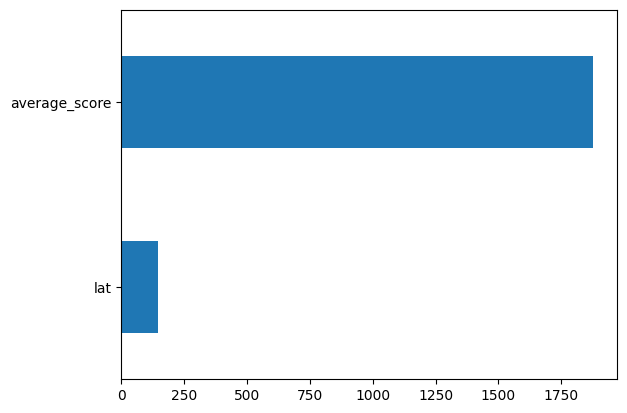

In [ ]:
y=y.astype('int')

...
from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn. В основе метода оценки значимости переменных лежит изученный вами в юнитах по статистике анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).

Метод возвращает двумерный массив f-статистик и p-value для каждого признака. В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.

<Axes: >

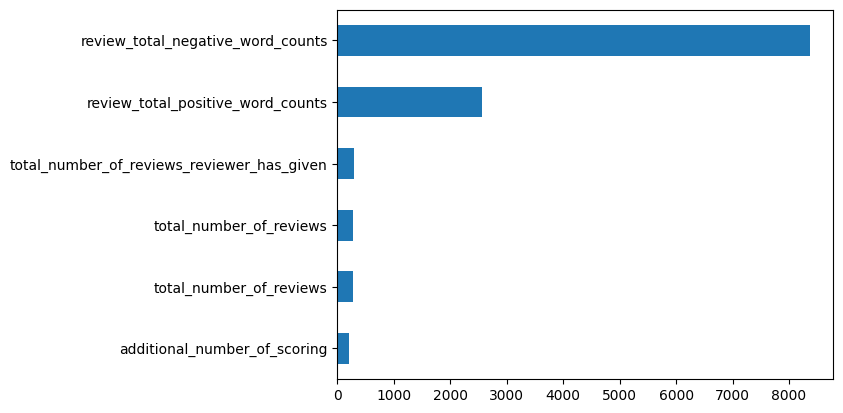

In [ ]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [ ]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [ ]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
hotels.info()
#hotels = hotels.drop(['review_date'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


In [ ]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 9 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386803 non-null  int64  
 1   average_score                               386803 non-null  float64
 2   review_total_negative_word_counts           386803 non-null  int64  
 3   total_number_of_reviews                     386803 non-null  int64  
 4   review_total_positive_word_counts           386803 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  386803 non-null  int64  
 6   reviewer_score                              386803 non-null  float64
 7   lat                                         386803 non-null  float64
 8   lng                                         386803 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 26.6 MB


In [ ]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.167673455441158


Небольшой бонус:


In [ ]:
# # убираем признаки которые еще не успели обработать, 
# # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
# object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
# hotels.drop(object_columns, axis = 1, inplace=True)

# # заполняем пропуски самым простым способом
# hotels = hotels.fillna(0)

In [ ]:

import pandas as pd

## Create a DataFrame
df = pd.DataFrame({
    'Product_Id': [1001, 1002, 1003, 1004],
    'Product_Name': ['Coffee powder', 'Black pepper', 'rosemary', 'Cardamom'],
    'customer_Name': ['Navya', 'Vindya', 'pooja', 'Sinchana'],
    'ordered_Date': ['16-3-2021', '17-3-2021', '18-3-2021', '18-3-2021'],
    'ship_Date': ['18-3-2021', '19-3-2021', '20-3-2021', '20-3-2021'],
    'Profit': [750, 652.14, 753.8, 900.12]
})

## Use the rank() method to assign ranks to the 'Profit' column
df['ranked_profit'] = df['Profit'].rank(ascending=False)

## Display the DataFrame
df

,Product_Id,Product_Name,customer_Name,ordered_Date,ship_Date,Profit,ranked_profit
0,1001,Coffee powder,Navya,16-3-2021,18-3-2021,750.00,3.0
1,1002,Black pepper,Vindya,17-3-2021,19-3-2021,652.14,4.0
2,1003,rosemary,pooja,18-3-2021,20-3-2021,753.80,2.0
3,1004,Cardamom,Sinchana,18-3-2021,20-3-2021,900.12,1.0


In [ ]:
import pandas as pd

## Create a DataFrame
df = pd.DataFrame({
    'column_1': [1, 3, 3, 4, 7]
})

## Use the rank() method with different methods
df['average_rank'] = df['column_1'].rank(method='average')
df['min_rank'] = df['column_1'].rank(method='min')
df['max_rank'] = df['column_1'].rank(method='max')
df['first_rank'] = df['column_1'].rank(method='first')
df['dense_rank'] = df['column_1'].rank(method='dense')

## Display the DataFrame
df

,column_1,average_rank,min_rank,max_rank,first_rank,dense_rank
0,1,1.0,1.0,1.0,1.0,1.0
1,3,2.5,2.0,3.0,2.0,2.0
2,3,2.5,2.0,3.0,3.0,2.0
3,4,4.0,4.0,4.0,4.0,3.0
4,7,5.0,5.0,5.0,5.0,4.0


In [ ]:
## Import the pandas library
import pandas as pd
import numpy as np

## Create a DataFrame with null values
df = pd.DataFrame({
    'column_1': [1, 3, np.nan, 4, np.nan],
    'column_2': [1, 2, 3, np.nan, np.nan]
})

## Use the rank() method with different na_option parameters
df['keep_rank_Nan'] = df['column_2'].rank(na_option='keep')
df['Top_rank_Nan'] = df['column_2'].rank(na_option='top')
df['Bottom_rank_Nan'] = df['column_2'].rank(na_option='bottom')

## Display the DataFrame
df

,column_1,column_2,keep_rank_Nan,Top_rank_Nan,Bottom_rank_Nan
0,1.0,1.0,1.0,3.0,1.0
1,3.0,2.0,2.0,4.0,2.0
2,NaN,3.0,3.0,5.0,3.0
3,4.0,NaN,NaN,1.5,4.5
4,NaN,NaN,NaN,1.5,4.5
